# Performance of BinaryConnect

In [1]:
% matplotlib inline


import os
import matplotlib.pyplot as plt

from scripts.utils import ExpResults

In [2]:
plotproperties = {'font.size': 13,
                  'axes.titlesize': 'xx-large',
                  'axes.labelsize': 'xx-large',
                  'xtick.labelsize': 'xx-large',
                  'xtick.major.size': 7,
                  'xtick.minor.size': 5,
                  'ytick.labelsize': 'xx-large',
                  'ytick.major.size': 7,
                  'ytick.minor.size': 5,
                  'legend.fontsize': 'xx-large',
                  'figure.figsize': (7, 6),
                  'savefig.dpi': 300,
                  'savefig.format': 'jpg'}

import matplotlib as mpl
mpl.rcParams.update(plotproperties)

## Parameters and definitions

In [3]:
log_dir = '/home/rbodo/.snntoolbox/data/cifar10/binaryconnect/log/gui'
runlabel_fp = log_dir + '/01'
path_fp = os.path.join(log_dir, runlabel_fp)
runlabel_binarized = log_dir + '/02'
path_binarized = os.path.join(log_dir, runlabel_binarized)

scale = 1e3  # Scale from MOps to GOps

In [4]:
exp_fp = ExpResults(path_fp, 'full-precision', '.', scale=scale)
exp_binarized = ExpResults(path_binarized, 'binarized', '.', 'green', scale=scale)
experiments = [exp_fp, exp_binarized]

Using Theano backend.


Using cuDNN version 5005 on context None
Mapped name None to device cuda: GeForce GTX 980 Ti (0000:01:00.0)


## Plot error vs operations

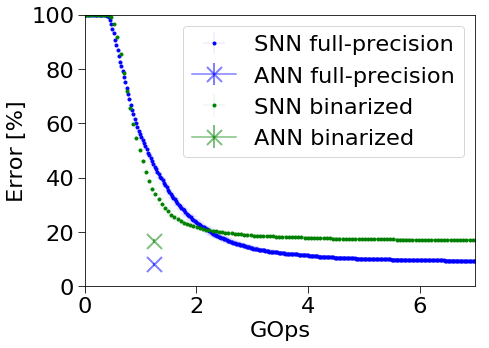

In [5]:
show_numbers = False

plt.figure(figsize=(7, 5))

for exp in experiments:
    plt.errorbar(exp.mean_computations_t, exp.e1_mean, xerr=exp.std_computations_t,
                 yerr=exp.e1_confidence95, fmt=exp.marker, label='SNN '+exp.label, capsize=0, elinewidth=0.1, color=exp.color1)
    plt.errorbar(exp.operations_ann, exp.e1_ann, marker='x', label='ANN '+exp.label, color=exp.color1, markersize=15,
                 yerr=exp.e1_confidence95_ann, elinewidth=2, capthick=2, markeredgewidth=2, alpha=0.5)

exp = experiments[0]
if show_numbers:
    plt.annotate('({:.2f}, {:.2f})'.format(exp.operations_ann, exp.e1_ann), xy=(exp.operations_ann - 0.15, exp.e1_ann + 10), color=exp.color1)
    plt.annotate('({:.2f}, {:.2f})'.format(exp.op1_optimal, exp.e1_optimal), xy=(exp.op1_optimal, exp.e1_optimal),
                 xytext=(exp.op1_optimal, exp.e1_optimal + 10),
                 arrowprops=dict(color=exp.color1, shrink=0.05, width=5, headwidth=10), color=exp.color1)

exp = experiments[1]
if show_numbers:
    plt.annotate('({:.2f}, {:.2f})'.format(exp.operations_ann, exp.e1_ann), xy=(exp.operations_ann - 0.15, exp.e1_ann + 10), color=exp.color1)
    plt.annotate('({:.2f}, {:.2f})'.format(exp.op1_optimal, exp.e1_optimal), xy=(exp.op1_optimal, exp.e1_optimal),
                 xytext=(exp.op1_optimal, exp.e1_optimal + 10),
                 arrowprops=dict(color=exp.color1, shrink=0.05, width=5, headwidth=10), color=exp.color1)

plt.xlim(0, 7)
plt.ylim(0, 100)
plt.ylabel('Error [%]')
plt.xlabel('GOps')
plt.legend(loc='upper right')
# plt.title('ANN vs SNN performance')
plt.savefig(os.path.join(log_dir, 'err_vs_ops'), bbox_inches='tight')

In [5]:
for exp in experiments:
    print(exp.label)
    print('ANN top-1:                         ({:.5f} GOps/frame, {:.2f} %)'.format(exp.operations_ann, exp.e1_ann))
    print('SNN top-1 best error:         ({:.5f} GOps/frame, {:.2f} %)'.format(exp.op1_0, exp.e1_0))
    print('SNN top-1 converged:        ({:.5f} GOps/frame, {:.2f} %)'.format(exp.op1_1, exp.e1_1))
    print('SNN top-1 jointly optimal:  ({:.5f} GOps/frame, {:.2f} %)'.format(exp.op1_optimal, exp.e1_optimal))
    print('SNN top-1 same op:           ({:.5f} GOps/frame, {:.2f} %)'.format(exp.op1_2, exp.e1_2))
    print('')

full-precision
ANN top-1:                         (1.23439 GOps/frame, 8.09 %)
SNN top-1 best error:         (7.04576 GOps/frame, 9.37 %)
SNN top-1 converged:        (4.85489 GOps/frame, 10.36 %)
SNN top-1 jointly optimal:  (1.94371 GOps/frame, 24.64 %)
SNN top-1 same op:           (1.25013 GOps/frame, 44.47 %)

binarized
ANN top-1:                         (1.23439 GOps/frame, 16.81 %)
SNN top-1 best error:         (11.04277 GOps/frame, 16.65 %)
SNN top-1 converged:        (4.33643 GOps/frame, 17.62 %)
SNN top-1 jointly optimal:  (1.89039 GOps/frame, 22.48 %)
SNN top-1 same op:           (1.26431 GOps/frame, 34.08 %)

